In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt

from src.datasets import BiosensorDataset, create_datasets

In [7]:
torch.manual_seed(42)
np.random.seed(42)

data_path = 'data_with_centers/'
train_percent = 0.737
bio_len = 8
mask_size = 320
batch_size = 1

# files = os.listdir(data_path)
# train_size = int(train_percent * len(files))
# print(train_size)
# val_size = len(files) - train_size
# print(val_size)

train_dataset, val_dataset = create_datasets(data_path, train_percent, bool, biosensor_length=bio_len, mask_size=mask_size, augment=False, dilation=0, input_scaling=False, upscale_mode='bilinear') # nearest bilinear bicubic 

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

torch.Size([1, 8, 80, 80])
torch.Size([1, 320, 320])


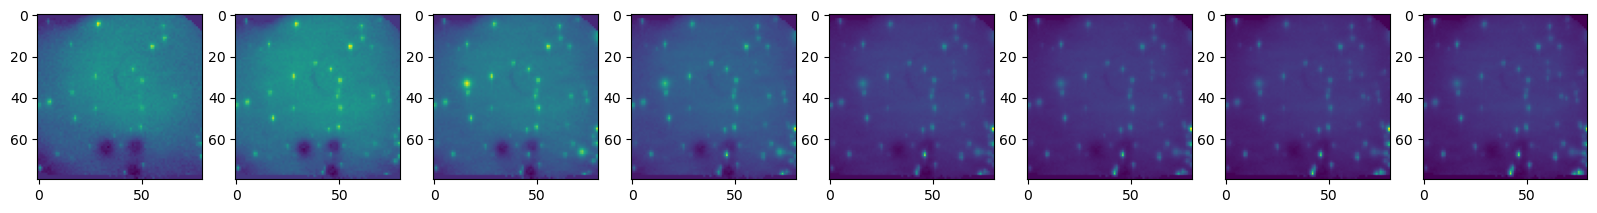

In [3]:
loader_iter = iter(train_loader)
bio, mask = next(loader_iter)

print(bio.shape)
print(mask.shape)
plt.figure(figsize=(20, 40))  # Adjust as needed
for i in range(bio_len):
    plt.subplot(1, bio_len, i+1)
    plt.imshow(bio[0, i, :, :])
plt.show()


torch.Size([1, 8, 80, 80])
torch.Size([1, 80, 80])


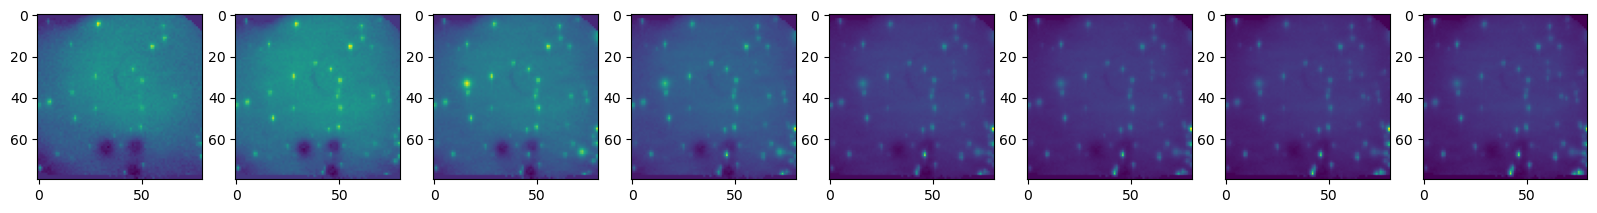

In [ ]:
loader_iter = iter(train_loader)
bio, mask = next(loader_iter)
print(bio.shape)
print(mask.shape)
plt.figure(figsize=(20, 40))  # Adjust as needed
for i in range(bio_len):
    plt.subplot(1, bio_len, i+1)
    plt.imshow(bio[0, i, :, :])
plt.show()

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

data_path = 'data_with_centers/'
train_percent = 0.495
test_percent = 0.30
bio_len = 8
mask_size = 80
batch_size = 8

# files = os.listdir(data_path)
# train_size = int(train_percent * len(files))
# print(train_size)
# val_size = len(files) - train_size
# print(val_size)

train_dataset, val_dataset, test_dataset = create_datasets(data_path, train_percent, bool, test_percent=test_percent, biosensor_length=bio_len, mask_size=mask_size, augment=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(len(train_loader), len(val_loader), len(test_loader))

80 35 48


In [ ]:
data_path = 'data_with_centers/'
data_bool = BiosensorDataset(data_path, mask_type=bool, biosensor_length=128, mask_size=80)
data_loader_bool = DataLoader(data_bool, batch_size=1, shuffle=False)

torch.Size([1, 128, 80, 80])
torch.Size([1, 80, 80])
tensor([0, 1], dtype=torch.uint8)
2


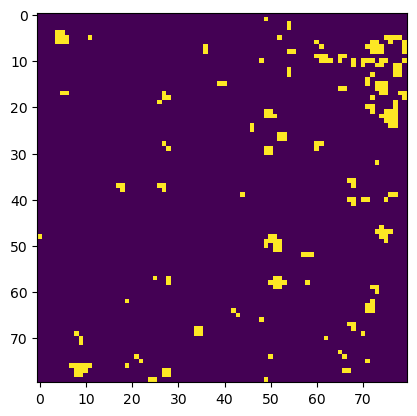

In [ ]:
for bio, mask in data_loader_bool:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

In [ ]:
data80 = BiosensorDataset(path = data_path, mask_type=np.int8, biosensor_length=128, mask_size=80)
data_loader80 = DataLoader(data80, batch_size=1, shuffle=False)

data4000 = BiosensorDataset(path = data_path, mask_type=np.int8, biosensor_length=128, mask_size=4000)
data_loader4000 = DataLoader(data4000, batch_size=1, shuffle=False)

torch.Size([1, 128, 80, 80])
torch.Size([1, 4000, 4000])
tensor([  0,   4,   7,   8,  11,  13,  14,  15,  16,  17,  19,  21,  22,  23,
         26,  27,  28,  29,  30,  31,  32,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  62,  63,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  80,  81,  82,  83,  84,  85,  89,  90,  91,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 114, 117, 118,
        119, 120, 255], dtype=torch.uint8)
87


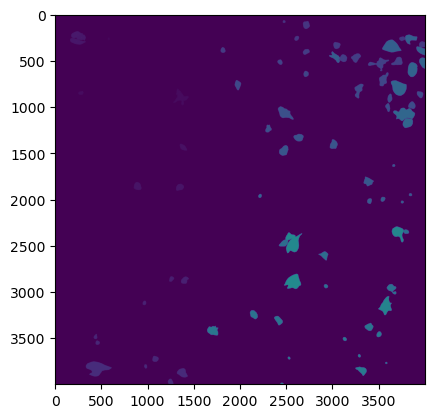

In [ ]:
for bio, mask in data_loader4000:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

torch.Size([1, 128, 80, 80])
torch.Size([1, 80, 80])
tensor([  0,   7,   8,  11,  13,  14,  15,  16,  17,  22,  26,  28,  30,  31,
         32,  39,  43,  44,  45,  46,  47,  48,  49,  52,  53,  54,  55,  56,
         57,  59,  60,  62,  63,  65,  67,  68,  70,  71,  72,  73,  75,  76,
         77,  78,  81,  82,  83,  84,  89,  90,  91,  94,  97,  99, 100, 103,
        106, 114, 117, 118, 119, 120, 255], dtype=torch.uint8)
63


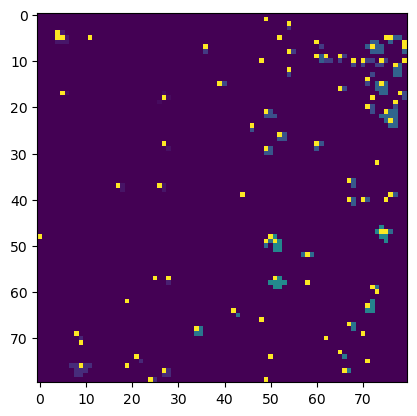

In [ ]:
for bio, mask in data_loader80:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

In [ ]:
# Megjavítva azáltal hogy sejtek középpontjait is eltároljuk az adatokban így az interpolálás után azokat vissza tudjuk adni a maszkokhoz
# Így minden sejt legalább egy pixelként fog szerepelni a leinterpolált maszkokon

# Érdekes lehet megnézni hogy a leinterpolált maszkokon hány sejt van
# Ha intként marad akkor a különböző számokat megnézni az eredeti és a leinterpolált maszkokon (unique)
# Lehet hogy a leinterpolált maszkokon sokkal kevesebb sejt lesz mert összeolvadnak
unique4000 = []
max4000 = []
unique80 = []
for bio, mask in data_loader4000:
    unique4000.append(len(mask[0].unique()))
    max4000.append(mask[0].max().item())
for bio, mask in data_loader80:
    unique80.append(len(mask[0].unique()))

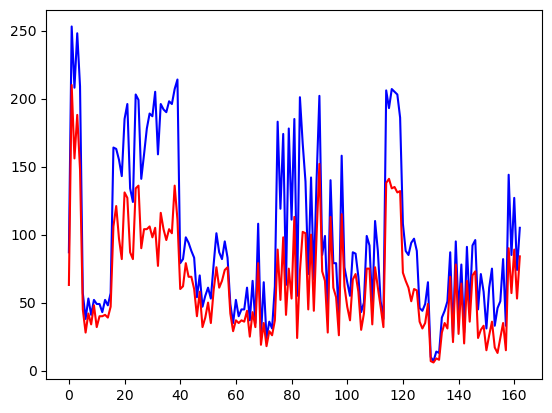

In [ ]:
# Ilyen nagy volt a különbség a leinterpolált és a nagy felbontású maszkok között
plt.plot(unique4000, label='4000', color='blue')
plt.plot(unique80, label='80', color='red')